# Steps to spin a GPU VM Instance in GCP 


    1  conda info
    2  conda create -n llm
    3  conda activate llm
    4  nvidia-smi
    5  conda install pytorch torchvision torchaudio cudatoolkit -c pytorch-nightly
    6  nvcc --version
    
    nvcc: NVIDIA (R) Cuda compiler driver
    Copyright (c) 2005-2023 NVIDIA Corporation
    Built on Mon_Apr__3_17:16:06_PDT_2023
    Cuda compilation tools, release 12.1, V12.1.105
    Build cuda_12.1.r12.1/compiler.32688072_0
    
    7 pip install ipython
    8 python version : Python 3.11.9
    9 pip install ipykernel
    10 ipython kernel install --user --name=llm
    11 python -m ipykernel install --user --name=llm
    12 pip install jupyter
    13 jupyter notebook --generate-config
    14 update config 
    
    c.NotebookApp.ip = '*'
    c.NotebookApp.open_browser = False
    c.NotebookApp.port = 8083
    
    15 jupyter notebook password
    16 nohup jupyter notebook --no-browser --port 8083

In [ ]:
!nvidia-smi

## Installation

In [ ]:
!pip install numpy

In [ ]:
!pip install torchvision

In [ ]:
!pip install matplotlib

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install torch

In [ ]:
!pip install seaborn

In [ ]:
!pip3 freeze > requirements.txt

## Verify CUDA

In [1]:
import torch
# Check if CUDA is available
if torch.cuda.is_available():
    print("CUDA is available. PyTorch was installed with CUDA support.")
    # Print CUDA device information
    print(f"CUDA Device Count: {torch.cuda.device_count()}")
    print(f"CUDA Device Name: {torch.cuda.get_device_name(0)}")
else:
    print("CUDA is not available. PyTorch was installed without CUDA support.")

CUDA is available. PyTorch was installed with CUDA support.
CUDA Device Count: 1
CUDA Device Name: NVIDIA L4


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## Import

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import random
from torchvision import datasets


# Load Dataset and preprocessing
The provided code defines a transformation pipeline using transforms.Compose from the torchvision.transforms module in PyTorch. This pipeline is typically used to preprocess or augment data before feeding it into a neural network. Here's an explanation of each transformation in the pipeline:

• transforms.ToTensor(): Converts the input image or data into a PyTorch tensor. This transformation converts the image data into a tensor format that can be processed by a neural network.

• transforms.Normalize((0.5,), (0.5,)): Normalizes the tensor data by subtracting the mean (0.5) and dividing by the standard deviation (0.5). This normalization step helps in stabilizing the training process by bringing the data into a common scale and range.


By applying this transformation pipeline to the input data, you are converting it into a tensor format and normalizing it to have a mean of 0.5 and a standard deviation of 0.5. This preprocessing step is common in machine learning tasks to improve model performance and convergence during training.

In [4]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))]) # 1 channel grayscale not 3 channels

trainset: This is the dataset that the DataLoader will iterate over during training. It contains the training data samples.

• batch_size=64: Specifies the number of samples to load per batch during training. In this case, each batch will contain 64 samples.

• shuffle=True: Indicates that the DataLoader will shuffle the training data before creating batches. Shuffling the data helps in randomizing the order of samples in each batch, which can improve the model's learning by preventing it from memorizing the order of the data.


By using this DataLoader configuration, the training data (trainset) will be divided into batches of size 64, and these batches will be shuffled before being fed into the neural network for training. This DataLoader simplifies the process of iterating over the training data in batches during the training process.


In [5]:

# A DataLoader object for both train and test sets is created using the train and test sets loaded from torchvision.

# Loading the dataset
mnist_dataset = torchvision.datasets.MNIST(root="data", train=True, download=True, transform=transform)

# Defining the sizes of train, validation, and test sets
train_size = int(0.6 * len(mnist_dataset))  # 60% for training
val_size = int(0.2 * len(mnist_dataset))    # 20% for validation
test_size = len(mnist_dataset) - train_size - val_size  # Remaining for test (20%)

# Splitting the MNIST dataset 

train_dataset, val_dataset, test_dataset = random_split(mnist_dataset, [train_size, val_size, test_size])

# Create test set and define test dataloader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)

In [6]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In this case, the tensor has a size of 64 elements in the first dimension, 1 element in the second dimension, and dimensions of 28x28 in the last two dimensions. This size indicates that the tensor is likely representing a batch of 64 grayscale images, each with a size of 28x28 pixels.

In [7]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([128, 1, 28, 28])
torch.Size([128])


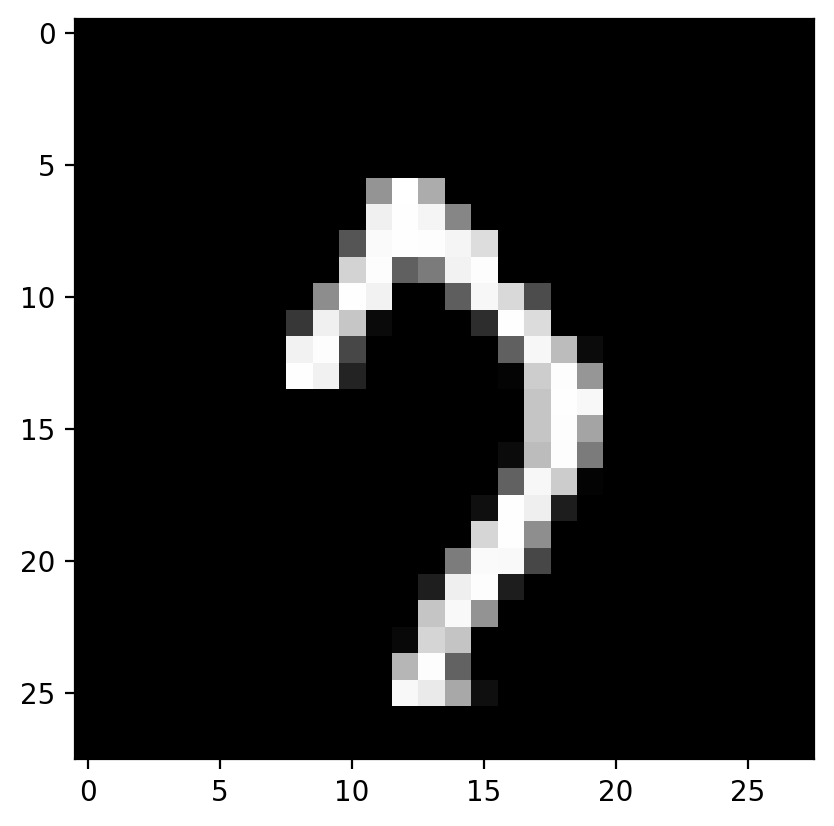

In [8]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [9]:
# This cell contains a function for showing 5 images from a dataloader
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

3


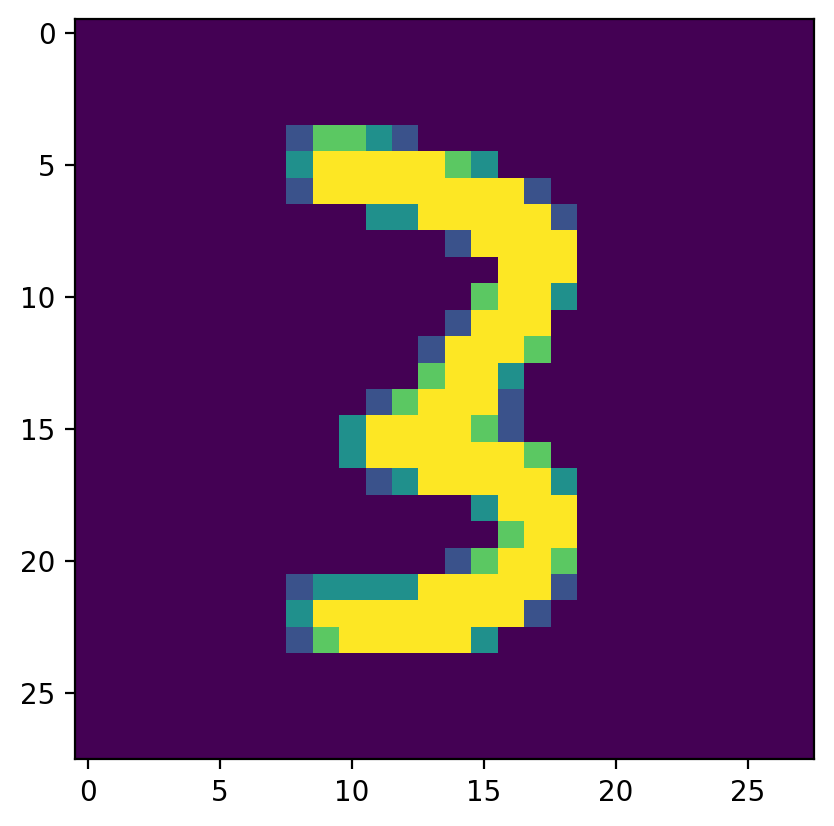

4


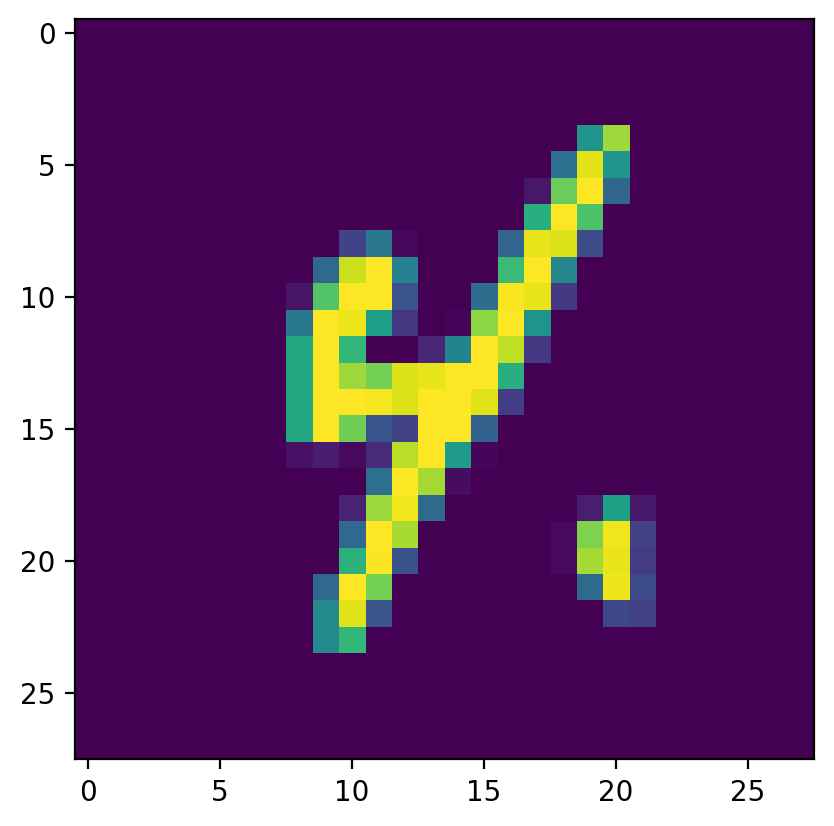

5


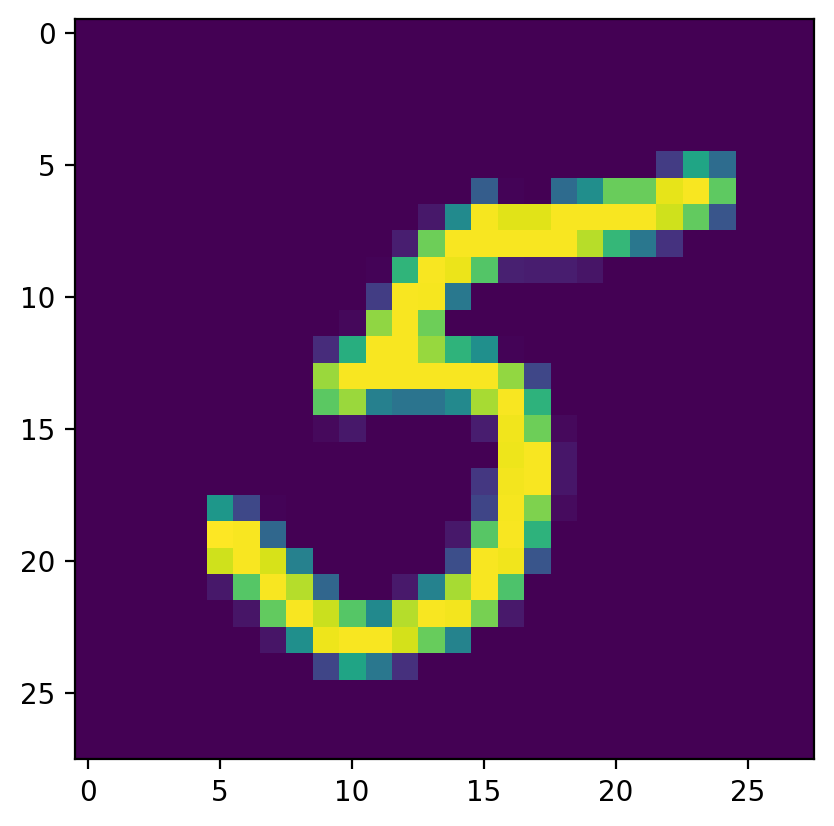

4


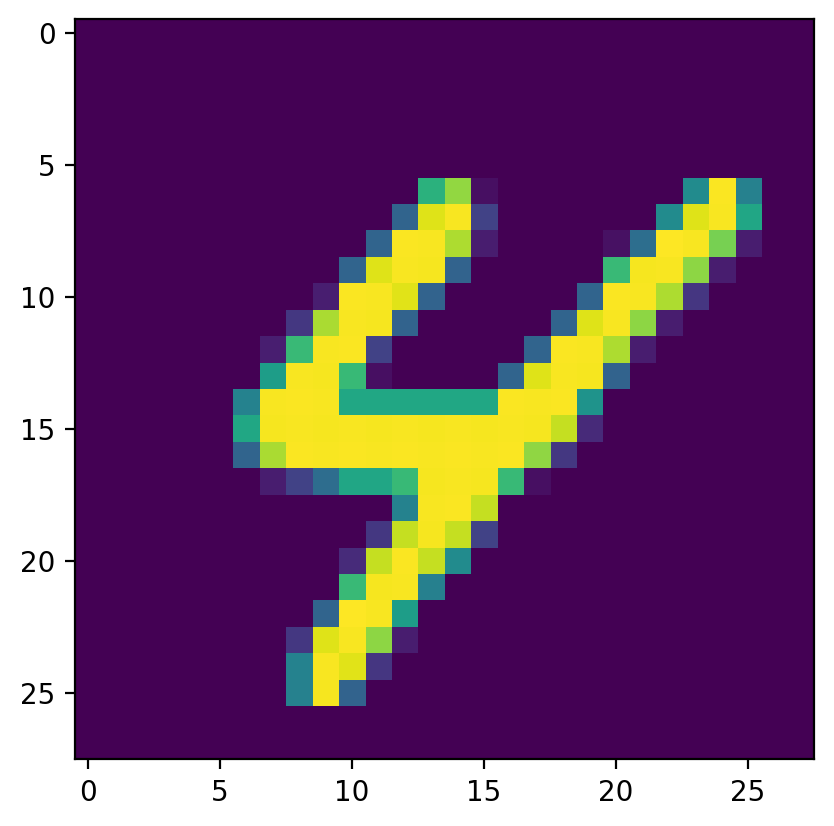

2


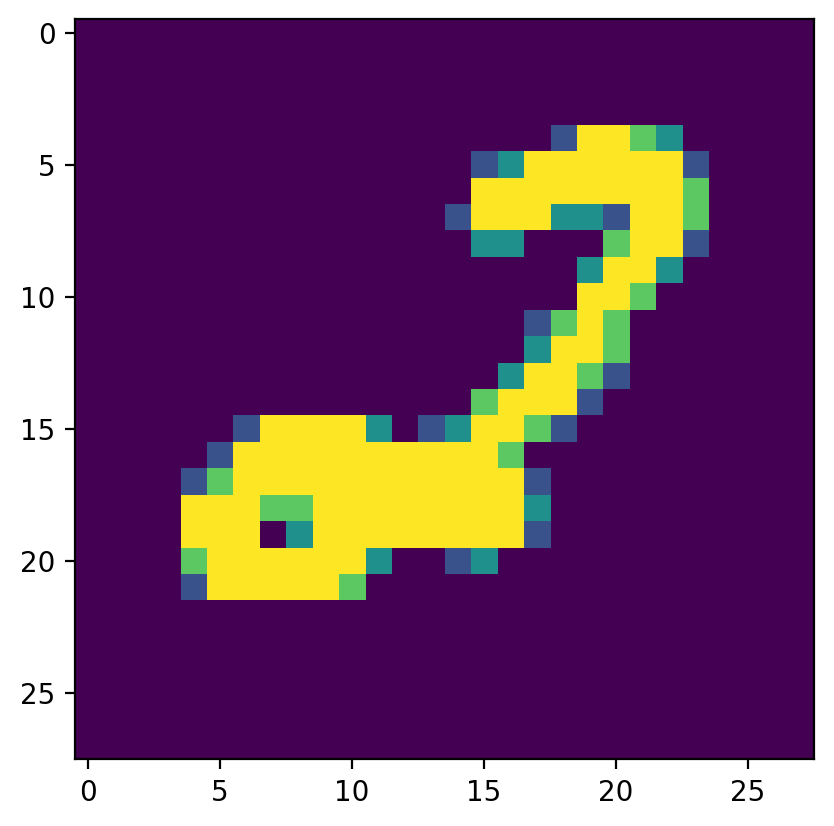

7


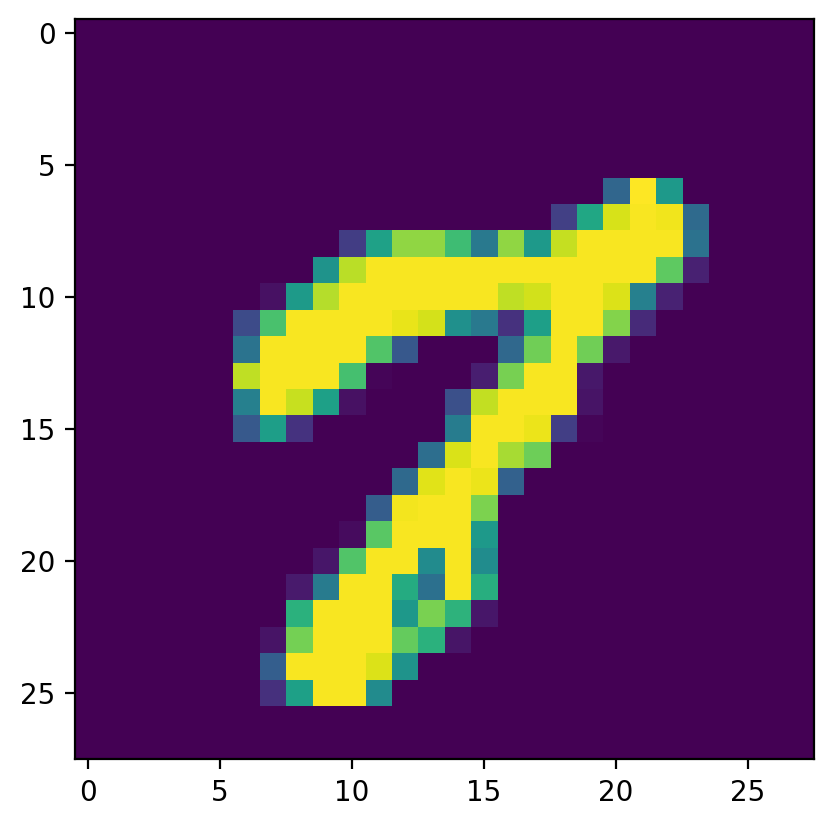

8


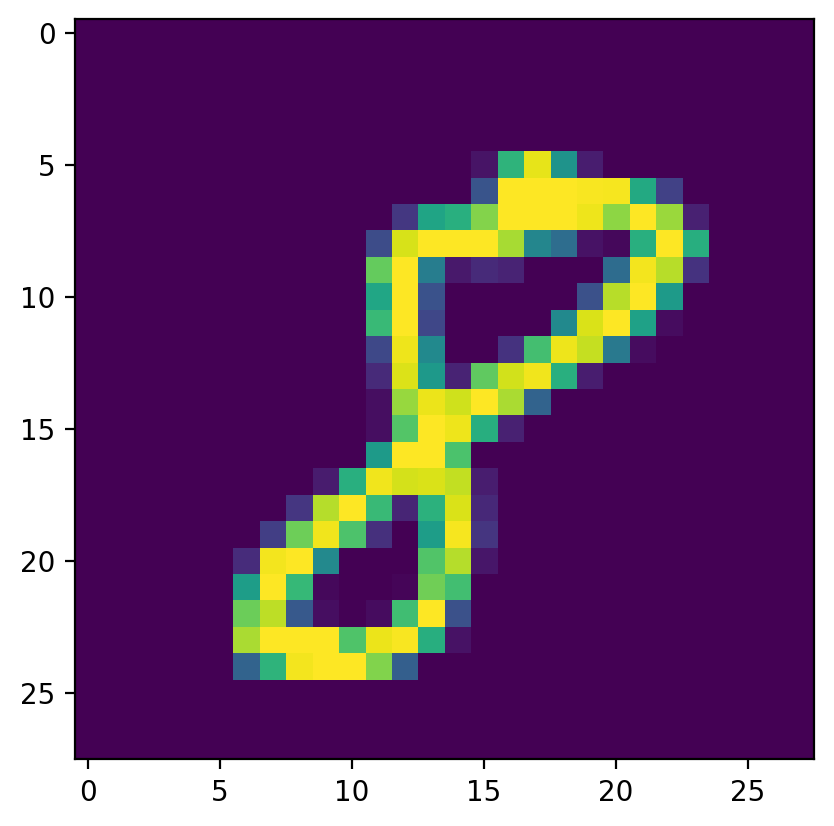

2


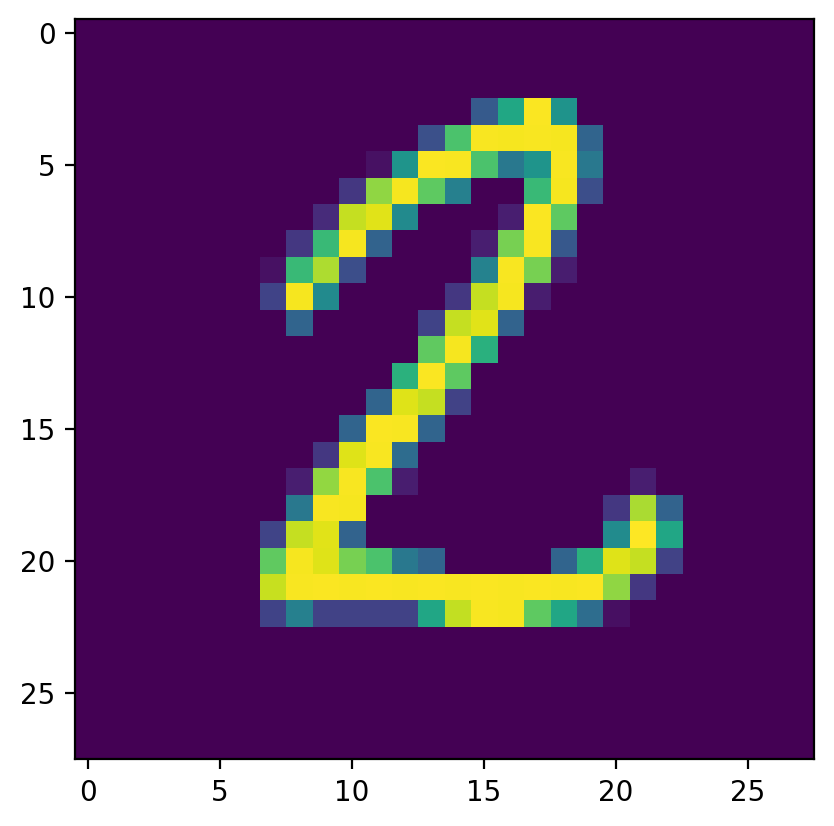

4


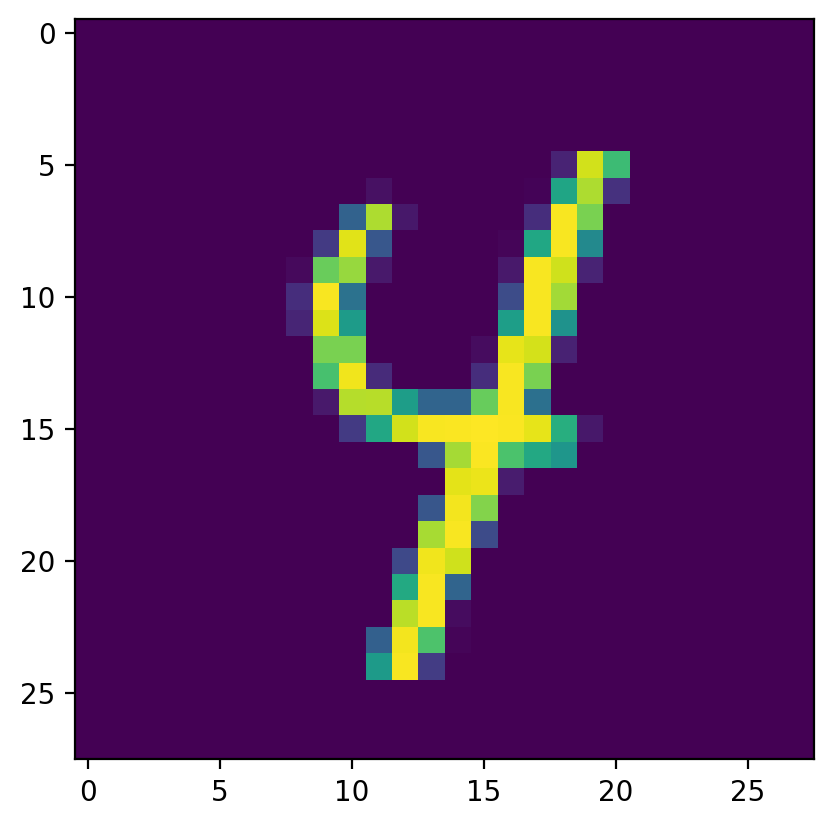

3


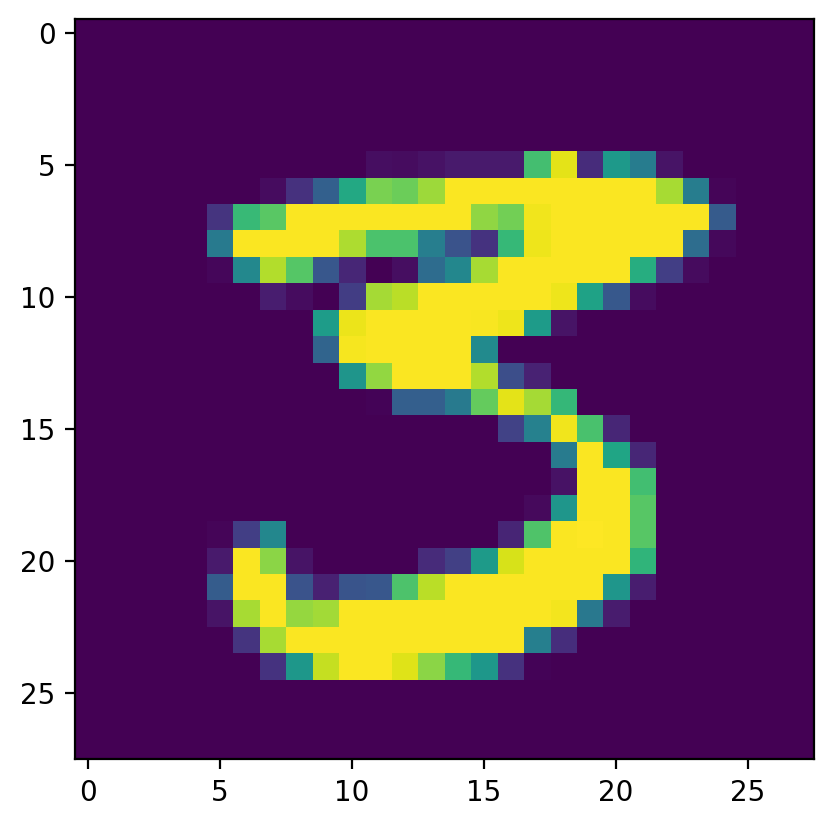

In [10]:
# Explore data - Notebook contains code which shows the size and shape of the training and test data
transform_raw = transforms.Compose([transforms.ToTensor()])

training_data_raw = datasets.MNIST(root="data", train=True, download=True, transform = transform_raw)
train_loader_raw = DataLoader(training_data_raw, batch_size=32, shuffle=True)

show5(train_loader_raw)

testing_data_raw = datasets.MNIST(root="data", train=True, download=True, transform = transform_raw)
test_loader_raw = DataLoader(testing_data_raw, batch_size=32, shuffle=True)

show5(test_loader_raw)

## Calculate class probabilities to check if we have class imbalance problem

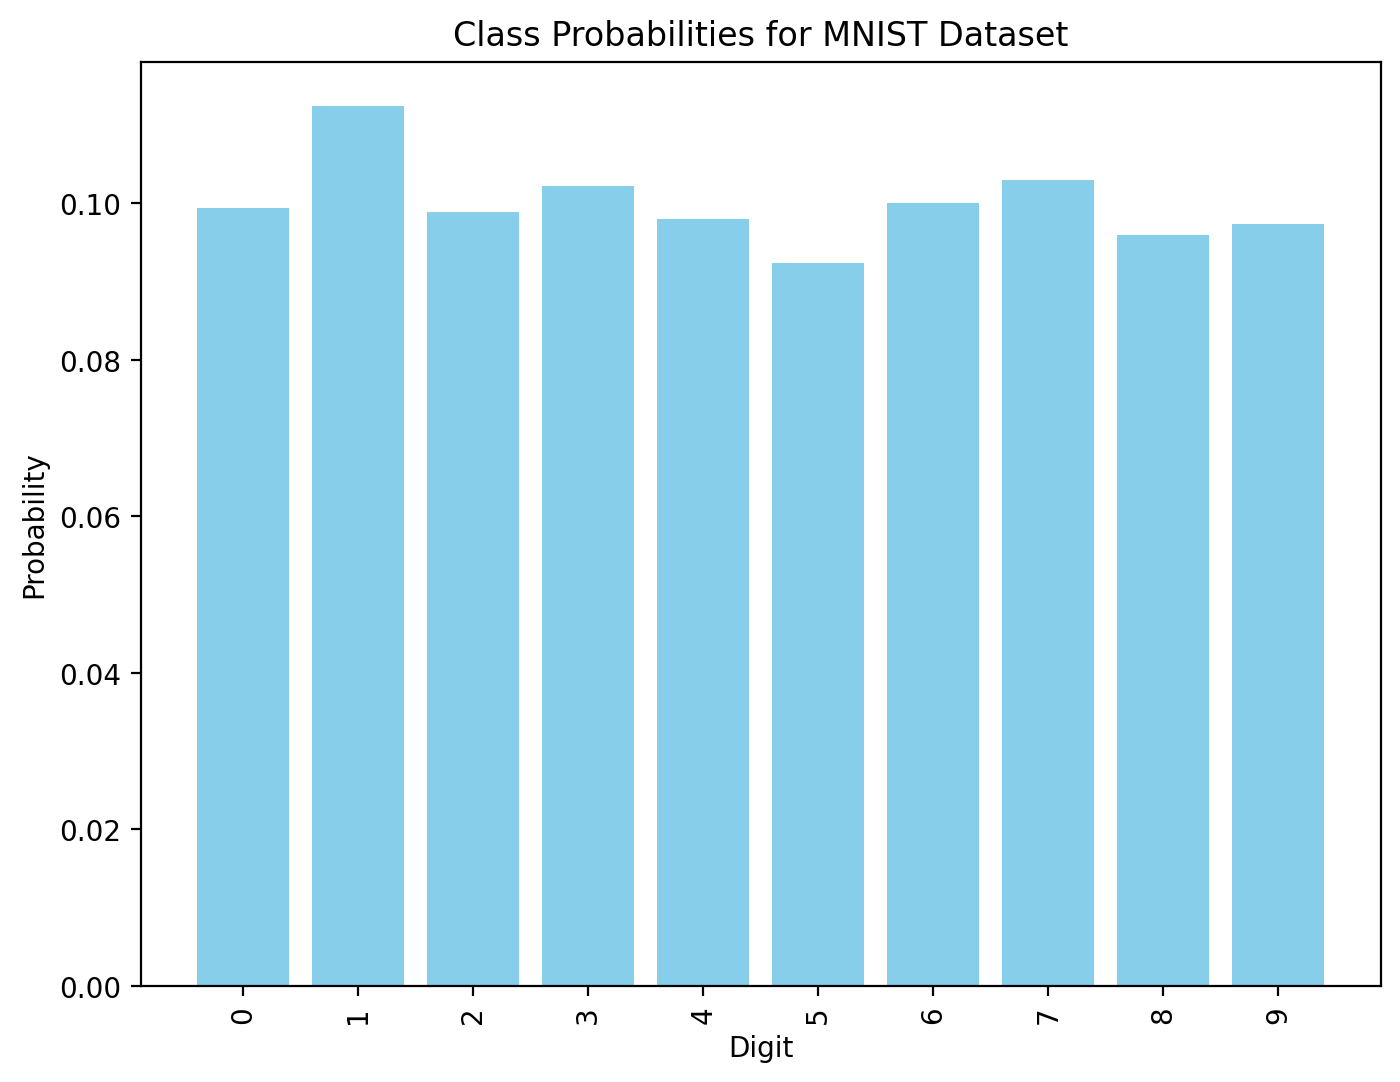

In [12]:
# Calculate class probabilities
class_counts = torch.zeros(10)  # 10 classes for MNIST (digits 0-9)
total_samples = len(train_dataset)

for data, target in train_dataset:
    class_counts[target] += 1
class_probabilities = class_counts / total_samples
class_probabilities


# Digits (0-9) for x-axis
digits = list(range(10))

# Plot the class probabilities with custom x-axis tick interval
plt.figure(figsize=(8, 6))
plt.bar(digits, class_probabilities, color='skyblue')
plt.xlabel('Digit')
plt.ylabel('Probability')
plt.title('Class Probabilities for MNIST Dataset')
plt.xticks(digits, rotation='vertical')  # Set x-axis ticks to digits with vertical rotation
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))  # Set x-axis tick interval to 1
plt.show()

## Neural Network (neural network model class named Net using PyTorch's nn.Module class)

In [13]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.layer1 = nn.Linear(28 * 28 * 1, 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.activation(self.layer3(x))
        x = self.layer4(x)
        x = F.softmax(x, dim=1)
        return x

In [14]:
net = Net()

optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.99, weight_decay=0.001)
criterion = nn.CrossEntropyLoss()
net.to(device)

Net(
  (layer1): Linear(in_features=784, out_features=256, bias=True)
  (layer2): Linear(in_features=256, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=64, bias=True)
  (layer4): Linear(in_features=64, out_features=10, bias=True)
)

In [15]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in net.state_dict():
    print(param_tensor, "\t", net.state_dict()[param_tensor].size())

Model's state_dict:
layer1.weight 	 torch.Size([256, 784])
layer1.bias 	 torch.Size([256])
layer2.weight 	 torch.Size([128, 256])
layer2.bias 	 torch.Size([128])
layer3.weight 	 torch.Size([64, 128])
layer3.bias 	 torch.Size([64])
layer4.weight 	 torch.Size([10, 64])
layer4.bias 	 torch.Size([10])


In [16]:
 # number of epochs
num_epochs = 20

# creating lists for loss history
train_loss_history = list()
val_loss_history = list()

# The start of the training
for epoch in range(num_epochs):
    # putting the model in training mode
    net.train()
    # setting the epoch loss and number of correct predictions to zero
    train_loss = 0.0
    train_correct = 0
    total_predictions = 0
    
    for i, data in enumerate(train_loader):
        #Destructures the data tuple into inputs (features) and labels (target values).
        inputs, labels = data
        
        if torch.cuda.is_available():
            inputs, labels = inputs.to(device), labels.to(device)

        #Clears the gradients of all optimized tensors before performing backpropagation.
        optimizer.zero_grad()

        # Passes the input data through the neural network model (net) to obtain the output predictions.
        outputs = net(inputs)

        # Calculates the loss between the predicted outputs and the actual labels using a specified loss function (criterion)
        loss = criterion(outputs, labels)

        # Computes the gradients of the loss with respect to the model parameters for backpropagation.
        loss.backward()

        #Updates the model parameters based on the computed gradients and the optimization algorithm.
        optimizer.step()

        # Computes the predicted class labels by selecting the class with the highest probability from the output predictions.
        _, preds = torch.max(outputs.data, 1)

        #Updates the total number of predictions made during training.
        total_predictions += labels.size(0)

        # Calculates the number of correct predictions by comparing the predicted labels (preds) with the actual labels (labels).
        train_correct += (preds == labels).sum().item()
        # Accumulates the training loss for the current batch
        train_loss += loss.item()
        
    print(f"Epoch {epoch + 1} training accuracy: {train_correct/total_predictions * 100:.2f}% training loss: {train_loss/len(train_loader):.5f}")
    train_loss_history.append(train_loss/len(train_loader))
    
    # The validation phase
    val_loss = 0.0
    val_correct = 0
    total_predictions = 0
    #Sets the model (net) to evaluation mode, 
    #which disables dropout and batch normalization layers that behave differently during training and evaluation
    net.eval()
    for inputs, labels in val_loader:
        if torch.cuda.is_available():
            inputs, labels = inputs.to(device), labels.to(device)
        # Passes the input data through the neural network model (net) to obtain the output predictions during validation.
        outputs = net(inputs)
        # Calculates loss
        loss = criterion(outputs, labels)
        
        _, preds = torch.max(outputs.data, 1)
        total_predictions += labels.size(0)
        val_correct += (preds == labels).sum().item()
        val_loss += loss.item()
    print(f"Epoch {epoch + 1} validation accuracy: {val_correct/total_predictions * 100:.2f}% validation loss: {val_loss/len(val_loader):.5f}")
    val_loss_history.append(val_loss/len(val_loader))

Epoch 1 training accuracy: 33.11% training loss: 2.13438
Epoch 1 validation accuracy: 62.96% validation loss: 1.82989
Epoch 2 training accuracy: 64.89% training loss: 1.81065
Epoch 2 validation accuracy: 66.59% validation loss: 1.79409
Epoch 3 training accuracy: 68.77% training loss: 1.77260
Epoch 3 validation accuracy: 71.84% validation loss: 1.74045
Epoch 4 training accuracy: 73.34% training loss: 1.72689
Epoch 4 validation accuracy: 74.24% validation loss: 1.71739
Epoch 5 training accuracy: 77.82% training loss: 1.68344
Epoch 5 validation accuracy: 82.80% validation loss: 1.63308
Epoch 6 training accuracy: 85.94% training loss: 1.60446
Epoch 6 validation accuracy: 87.84% validation loss: 1.58354
Epoch 7 training accuracy: 88.28% training loss: 1.57984
Epoch 7 validation accuracy: 88.82% validation loss: 1.57474
Epoch 8 training accuracy: 90.46% training loss: 1.55842
Epoch 8 validation accuracy: 90.72% validation loss: 1.55519
Epoch 9 training accuracy: 91.64% training loss: 1.54714

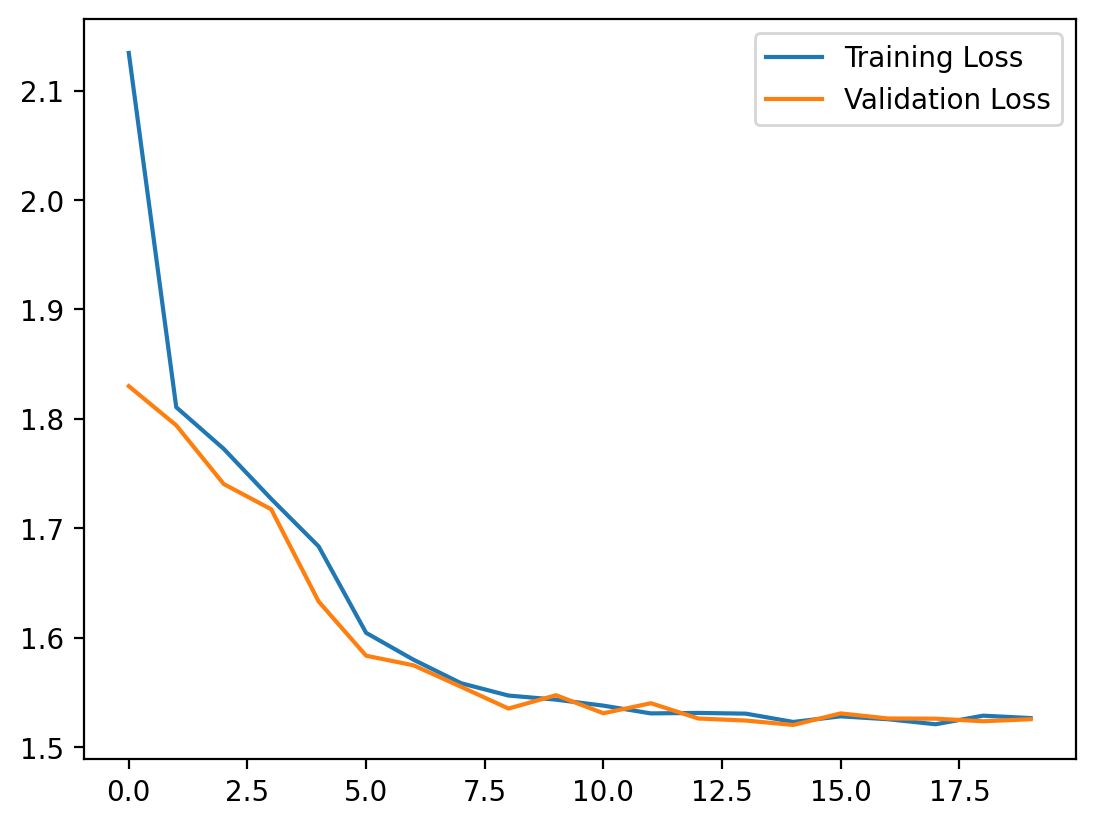

In [17]:
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

In [18]:
torch.save

<function torch.serialization.save(obj: object, f: Union[str, os.PathLike, BinaryIO, IO[bytes]], pickle_module: Any = <module 'pickle' from '/opt/conda/envs/llm/lib/python3.11/pickle.py'>, pickle_protocol: int = 2, _use_new_zipfile_serialization: bool = True, _disable_byteorder_record: bool = False) -> None>